## Temperatur lokalt og globalt

1. Temp data for Bergen siden 2005 (ca siden elevene ble født)
2. Temp data for Bergen siden starten av perioden (ca 1860) for å sette den nye perioden i perspektiv
3. Global temp for å sette Bergen i perspektiv 
4. Lag en kurve som passer til temperaturen
5. Legg på CO2 og se om denne passer til temperaturen
6. Sjekk trenden for litt ulike perioder (tilsvarende den figuren han sendte)


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [7]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/ikkeGit/temperaturstriper'
# Endre dette filnavnet til det du har kalt filen du nettopp lastet ned. 
fil='/Global_temp1880-2022.txt'

# Pass på at resultatet av sti+fil er nøyaktig det samme som der filen
# faktisk ligger på PCen din. 
sti+fil

'W:/Work/Documents/EkteData/ikkeGit/temperaturstriper/Global_temp1880-2022.txt'

In [9]:
df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    skipinitialspace=True # Skip spaces after delimiter.
)

# Note: index_col=False can be used to force pandas to not use the first column
# as the index, e.g. when you have a malformed file with delimiters at the end 
# of each line.

In [10]:
df

,Year,Temp
0,1880.0,0.086
1,1881.0,0.168
2,1882.0,0.122
3,1883.0,0.066
4,1884.0,-0.062
...,...,...
138,2018.0,1.131
139,2019.0,1.255
140,2020.0,1.296
141,2021.0,1.130


In [14]:
tid, temp={},{}

In [15]:
tid['Global']=np.copy(df.iloc[:,0])
temp['Global']=np.copy(df.iloc[:,1])

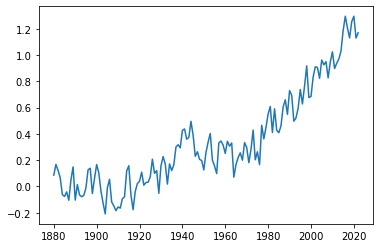

In [16]:
plt.plot(tid['Global'], temp['Global'])

In [17]:
fil='/Bergen_temp1862_2022.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    skipinitialspace=True # Skip spaces after delimiter.
)

# Note: index_col=False can be used to force pandas to not use the first column
# as the index, e.g. when you have a malformed file with delimiters at the end 
# of each line.

In [18]:
df

,Year,null,temp,variable
0,1862,0,7.76,0.13
1,1863,0,7.78,0.15
2,1864,0,6.91,-0.72
3,1865,0,7.28,-0.35
4,1866,0,7.45,-0.18
...,...,...,...,...
155,2018,0,8.74,1.11
156,2019,0,8.85,1.23
157,2020,0,9.46,1.83
158,2021,0,8.50,0.88


In [19]:
tid['Bergen']=np.copy(df.iloc[:,0])
temp['Bergen']=np.copy(df.iloc[:,2])
temp['Bergen']=np.copy(df.iloc[:,3]) # Anomalies?

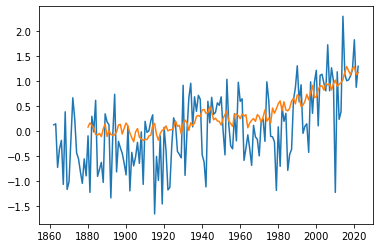

In [20]:
plt.plot(tid['Bergen'], temp['Bergen'])
plt.plot(tid['Global'], temp['Global'])

In [22]:
cmap=cm.get_cmap('RdBu_r', 12)
color=[cmap(i) for i in range(12)]

(-2.0, 2.4)

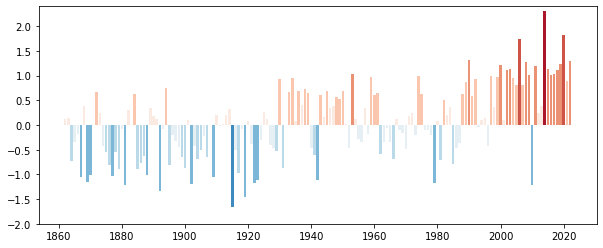

In [35]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -3 to 3, with 0.5 degree intervals
    c=int(np.floor((3+temp['Bergen'][i])*2))
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=color[c])
plt.ylim(-2, 2.4)

(-2.0, 2.4)

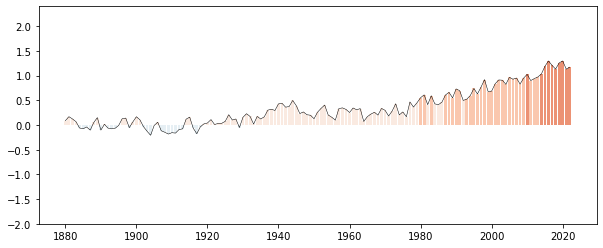

In [33]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Global'])):
    # For limits -3 to 3, with 0.5 degree intervals
    c=int(np.floor((3+temp['Global'][i])*2))
    plt.bar(tid['Global'][i], temp['Global'][i], color=color[c])
    
plt.plot(tid['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylim(-2, 2.4)

In [38]:
#colormap from the classical temperture stripes containing 8 blue 
# and 8 red colors
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])


In [49]:
# For limits -2 to 2, with 0.25 degree intervals
var=0.1
(2+var)*4

8.4

(-2.0, 2.4)

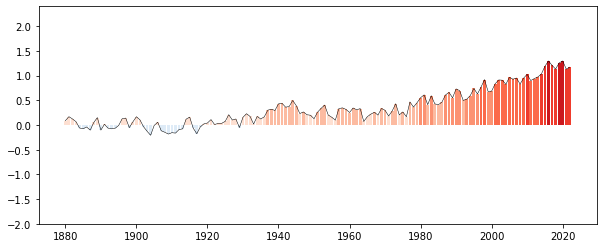

In [48]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Global'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Global'][i])*4))
    plt.bar(tid['Global'][i], temp['Global'][i], color=cmap.colors[c])
    
plt.plot(tid['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylim(-2, 2.4)

(-2.0, 2.4)

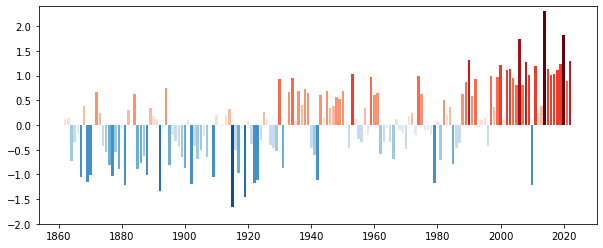

In [56]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

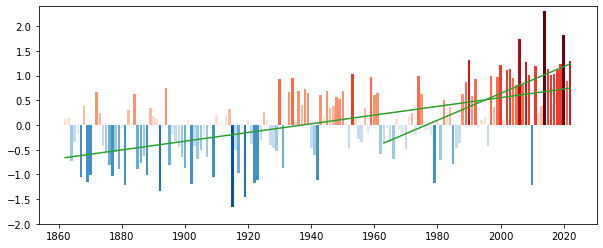

In [62]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1)   
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'C2', label='Trend')

a, b = np.polyfit(tid['Bergen'][100:], temp['Bergen'][100:], 1)   
plt.plot(tid['Bergen'][100:], a*tid['Bergen'][100:] + b, 'C2', label='Trend')

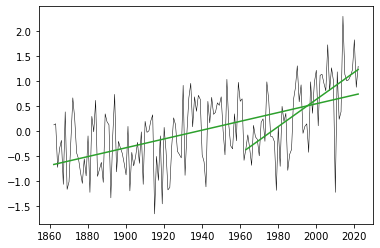

In [65]:
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5)
a, b = np.polyfit(tid['Bergen'], temp['Bergit en'], 1)   
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'C2', label='Trend')

a, b = np.polyfit(tid['Bergen'][100:], temp['Bergen'][100:], 1)   
plt.plot(tid['Bergen'][100:], a*tid['Bergen'][100:] + b, 'C2', label='Trend')

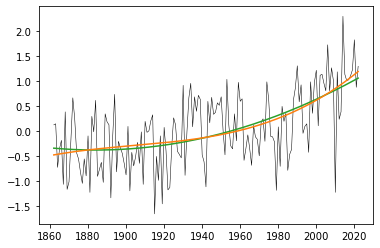

In [72]:
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5)
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
b = np.polyfit(tid['Bergen'], temp['Bergen'], 3)   
plt.plot(
    tid['Bergen'], 
    a[0]*tid['Bergen']**2 + a[1]*tid['Bergen'] + a[2], 
    'C2', label='Trend'
)
plt.plot(
    tid['Bergen'], 
    b[0]*tid['Bergen']**3 + b[1]*tid['Bergen']**2 + b[2]*tid['Bergen'] + b[3], 
    'C1', label='Trend'
)

In [138]:
# For limits -3 to 3, with 0.5 degree intervals
var=1.3
(3+var)*2

8.6